# Random numbers basics

**Table of contents**<a id='toc0_'></a>    
- 1. [Random numbers and simulation](#toc1_)    
- 2. [Motivation: Exchange economy with many consumers](#toc2_)    
- 3. [Random numbers](#toc3_)    
  - 3.1. [Numpy](#toc3_1_)    
  - 3.2. [Different distributions](#toc3_2_)    
  - 3.3. [Analytical results](#toc3_3_)    
- 4. [Load and save variables](#toc4_)    
  - 4.1. [Pickle](#toc4_1_)    
  - 4.2. [Saving with numpy](#toc4_2_)    
- 5. [Create a class to generate random numbers](#toc5_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

## 1. <a id='toc1_'></a>[Random numbers and simulation](#toc0_)

You will learn how to use a random number generator with a seed and produce simulation results (**numpy.random**, **scipy.stats**), and calcuate the expected value of a random variable through Monte Carlo integration. You will learn how to save your results for later use (**pickle**).

**Links:**

* [numpy.random](https://docs.scipy.org/doc/numpy-1.13.0/reference/routines.random.html)
* [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html)
* datacamp on [pickle](https://www.datacamp.com/community/tutorials/pickle-python-tutorial)

**Imports:** We now import all the modules, we need for this notebook. Importing everything in the beginning makes it more clear what modules the notebook relies on.

In [1]:
import pickle
import numpy as np

from scipy.stats import norm # normal distribution

%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"-"})
plt.rcParams.update({'font.size': 14})

## 2. <a id='toc2_'></a>[Motivation: Exchange economy with many consumers](#toc0_)

Consider an **exchange economy** with

1. 2 goods, $(x_1,x_2)$
2. $N$ consumers indexed by $j \in \{1,2,\dots,N\}$
3. Preferences are Cobb-Douglas with uniformly *heterogenous* coefficients

$$
\begin{aligned}
u^{j}(x_{1},x_{2}) & = x_{1}^{\alpha_{j}}x_{2}^{1-\alpha_{j}}\\
 & \,\,\,\alpha_{j}\sim\mathcal{U}(\underline{\mu},\overline{\mu})\\
 & \,\,\,0<\underline{\mu}<\overline{\mu}<1
\end{aligned}
$$

4. Endowments are *homogenous* and given by

$$
\boldsymbol{e}^{j}=(e_{1}^{j},e_{2}^{j})=(k,1),\,k>0
$$
where good 2 is *numeraire*.

Giving income $I$, with the following budget constriant:
\begin{equation}
I \equiv kp_1+ p_2 \geq x_1p_1 + x_2
\end{equation}

The implied **demand functions** are:

$$
\begin{align}
x_{1}^{\star j}(p_{1},p_{2},e^{j})&=&\alpha_{j}\frac{I}{p_{1}}&=&\alpha_{j}\frac{kp_{1}+p_{2}}{p_{1}} \\
x_{2}^{\star j}(p_{1},p_{2},e^{j})&=&(1-\alpha_{j})\frac{I}{p_{2}}&=&(1-\alpha_{j})\frac{kp_{1}+p_{2}}{p_{2}}
\end{align}
$$

The **equilibrium** for a random draw of $\alpha = \{\alpha_1,\alpha_2,\dots,\alpha_N\}$ is a set of **prices** $p_1$ and $p_2$ satifying:

$$
\begin{aligned}
x_1(p_1,p_2) = \underset{\text{Demand}}{\underbrace{\sum_{j=1}^N x_{1}^{\star j}(p_{1},p_{2},e^{j})}} &=  \underset{\text{Supply}}{\underbrace{\sum_{j=1}^N e_1^j}} = Nk \\
x_2(p_1,p_2) = \sum_{j=1}^N x_{2}^{\star j}(p_{1},p_{2},e^{j}) &= \sum_{j=1}^N e_2^j = N
\end{aligned}
$$

**Problem:** Solve for this equilibrium.  
But this requires a **distribution** of agents. Which means randomness.  
We need a random number generator (RNG)

## 3. <a id='toc3_'></a>[Random numbers](#toc0_)

The two main approaches to generating random numbers are:

1. **Physical observations** of random processes (radioactive decay,  atmospheric noise, roulette wheels, etc.)
2. **Algorithms** creating **pseudo-random numbers**. Numbers that are *determined* by the algo but **appear** random.

**Pseudo-random numbers** satisfy properties such that they are as good as random. It should be impossible (for all practical purposes) to calculate, or otherwise guess, from any given subsequence, any previous or future values in the sequence.

**More information:** See this [video](https://www.youtube.com/watch?v=C82JyCmtKWg&app=desktop#fauxfullscreen) by Infinite Series.

### 3.1. <a id='toc3_1_'></a>[Numpy](#toc0_)

Numpy provides various functions for drawing random numbers. We can, for example, draw random integers between 0 and 10000:

In [2]:
X = np.random.randint(0,10000,size=5)
print(X)

[4944 2330 6446 9526 2077]


**Problem:** How can we reproduce our results the next time we open Python?

**Solution:** Use a **seed**. This will fix the algorithm to give the same set numbers each time.     
Choose the seed, and reset the random number generator:

In [4]:
print('set seed to 2000 and create numbers:')
np.random.seed(2000)
print(np.random.uniform(size=5))

print('\nreset algorithm by stating the same seed again:')
np.random.seed(2000)
print(np.random.uniform(size=5))

set seed to 2000 and create numbers:
[0.57051729 0.56452876 0.48844183 0.33647775 0.37586818]

reset algorithm by stating the same seed again:
[0.57051729 0.56452876 0.48844183 0.33647775 0.37586818]


We can also **save and load the state** of the random number generator.

In [5]:
# a. save state
state = np.random.get_state()
print('generate numbers from current state:')
print(np.random.uniform(size=5))

# b. draw some random number
print('\nchange state by generating some more numbers:')
print(np.random.uniform(size=5))

# c. reset state 
np.random.set_state(state)

# d. draw the same random numbers again
print('\ngenerate numbers from past state by reloading state:')
print(np.random.uniform(size=5))

generate numbers from current state:
[0.53203587 0.06810629 0.58452906 0.23789776 0.16075658]

change state by generating some more numbers:
[0.15211915 0.12706922 0.32744117 0.69415387 0.35896647]

generate numbers from past state by reloading state:
[0.53203587 0.06810629 0.58452906 0.23789776 0.16075658]


> **Important**: You should *only set the seed once* per program. Changing seed might brake randomness.

### 3.2. <a id='toc3_2_'></a>[Different distributions](#toc0_)

Draw random numbers from various distributions: normal, beta, uniform.

In [7]:
X = np.random.normal(loc=0,scale=1,size=10**6)
Y = np.random.beta(a=5,b=2,size=10**6)
Z = np.random.uniform(low=-2,high=2,size=10**6)

print(X)

[ 1.50171551 -1.60324022 -0.02560757 ...  0.52390524 -1.3564091
  1.43397249]


Create a **user-defined** probability distribution with `np.random.choice`

In [9]:
# a. Support of distribution
vec = np.array([-2.5,-2.0,-1.5,-1.0,-0.5,0,0.5,1.0,1.5,2])

# b. Define probabilities
prob = np.exp(np.linspace(-1,1,vec.size))**1.1254 # all positive numbers
prob /= np.sum(prob) # make probabilities sum to one
print(prob)

# c. Get draws from distribution
K = np.random.choice(vec,size=10**6,p=prob)
print(K)

[0.02538473 0.03259753 0.04185978 0.0537538  0.06902738 0.08864079
 0.11382714 0.14616993 0.1877026  0.24103633]
[2.  1.  1.5 ... 0.  2.  0.5]


Plot the various distributions:

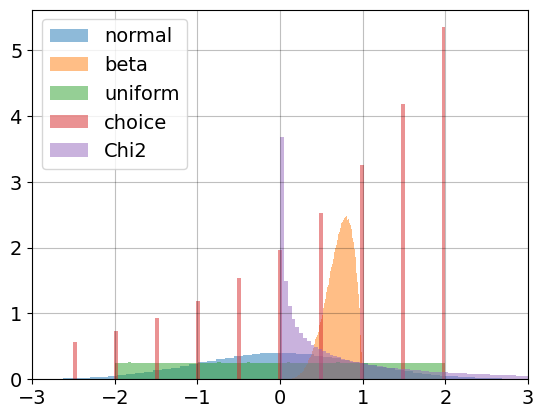

In [13]:
C = np.random.chisquare(df=1,size=10**6)

fig = plt.figure(dpi=100)
ax = fig.add_subplot(1,1,1)
ax.hist(X,bins=100,density=True,alpha=0.5,label='normal') # alpha < 1 = transparent
ax.hist(Y,bins=100,density=True,alpha=0.5,label='beta')
ax.hist(Z,bins=100,density=True,alpha=0.5,label='uniform')
ax.hist(K,bins=100,density=True,alpha=0.5,label='choice')
ax.hist(C,bins=500,density=True,alpha=0.5,label="Chi2")

ax.set_xlim([-3,3])
ax.legend(loc='upper left'); # note: the ; stops output from being printed

**Task:** Follow this [link](https://docs.scipy.org/doc/numpy-1.13.0/reference/routines.random.html). Choose a distribution and add it to the figure above.

### 3.3. <a id='toc3_3_'></a>[Analytical results](#toc0_)

Sometimes, you want to compare a distribution of numbers to a **known** distribution.   
For instance, how close are our draws to a normal distribution?  
In this case, the `scipy.stats.norm` module comes in handy.  
It operates differently from numpy. It creates an **object** to generate numbers from rather than just making an array at once. 

F pdf at 0.0:  0.399 
F cdf at 0.0:  0.500


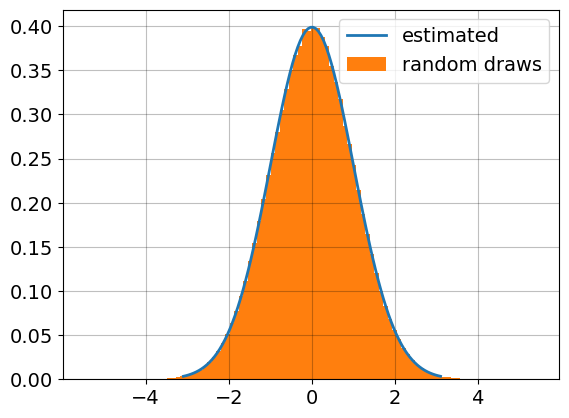

In [16]:
from scipy.stats import norm

# a. create analytical distribution
loc_guess = 0
scale_guess = 1

# Alternative: estimate the guesses
# loc_guess, scale_guess = norm.fit(X)

# Object to generate random numbers based on parameters
F = norm(loc=loc_guess,scale=scale_guess)
rnd = F.rvs(5) # example: create 5 random draws from the distribution F
print(f'F pdf at 0.0: {F.pdf(0.0): 1.3f} \nF cdf at 0.0: {F.cdf(0.0): 1.3f}') # the object F has several useful functions available  

# b. vector of x values
x_low = F.ppf(0.001) # x value where cdf is 0.001
x_high = F.ppf(0.999) # x value where cdf is 0.999
x_support = np.linspace(x_low,x_high,100)
x_guess = F.pdf(x_support) # call F to evaluate density at x_support

# c. compare X from before with new distribution
fig = plt.figure(dpi=100)
ax = fig.add_subplot(1,1,1)
ax.plot(x_support,x_guess,lw=2,label='estimated') 
ax.hist(X,bins=100,density=True,histtype='stepfilled', label = "random draws"); # plot X using a histogram
ax.legend()

**Task:** Make the pdf fit the histogram closely.

In [9]:
# Scipy is built on Numpy. So the seed set by Numpy is carried over to Scipy.
np.random.seed(1)
print(F.rvs(5))
np.random.seed(1)
print(F.rvs(5))

[ 1.46825902 -0.20881731 -0.14612881 -0.55472647  0.89905572]
[ 1.46825902 -0.20881731 -0.14612881 -0.55472647  0.89905572]


## 4. <a id='toc4_'></a>[Load and save variables](#toc0_)

### 4.1. <a id='toc4_1_'></a>[Pickle](#toc0_)

A good allround method for loading and saving is to use **pickle**. Here is how to save:

In [17]:
# a. variables
my_dict = {'a':1,'b':2}
my_vec = np.array([1,2,3])
my_tupple = (1,4,2)

# b. put them in a dictionary
my_data = {}
my_data['my_dict'] = my_dict
my_data['my_vec'] = my_vec
my_data['my_tupple'] = my_tupple

# c. save the dictionary in a file
with open(f'data.p', 'wb') as f: # wb = write binary
    pickle.dump(my_data, f)

Delete the variables:

In [18]:
del my_dict
del my_vec
del my_tupple

Load the data again:

In [19]:
# a. try
try:
    print(my_tupple)
except:
    print('my_vec does not exist')
    
# b. load    
with open(f'data.p', 'rb') as f: # rb = read binary
    data = pickle.load(f)

# Unpack data
my_dict = data['my_dict']
my_vec = data['my_vec']
my_tupple = data['my_tupple']

# c. try again
print(my_vec)
print(my_tupple)

my_vec does not exist
[1 2 3]
(1, 4, 2)


### 4.2. <a id='toc4_2_'></a>[Saving with numpy](#toc0_)

When only saving/loading **numpy arrays**, an alternative is to use ``np.savez`` (or ``np.savez_compressed``). This is typically faster than pickle.

Here is how to save some data:

In [20]:
my_data = {}
my_data['A'] = np.array([1,2,3])
my_data['B'] = np.zeros((5,8))
my_data['C'] = np.ones((7,3,8))
np.savez(f'data.npz', **my_data)
# '**' unpacks the dictionary

Here is how to load the data again:

In [21]:
# a. delete
del my_data

# a. load all
my_data = {}
with np.load(f'data.npz') as data_obj:
    for key in data_obj.files:
        my_data[key] = data_obj[key]
print(my_data['A'])

# b. load single array
X = np.load(f'data.npz')['A']
print(X)

[1 2 3]
[1 2 3]


## 5. <a id='toc5_'></a>[Create a class to generate random numbers](#toc0_)

In [41]:
class dice_cup:
    
    def __init__(self,ndice):
        self.ndice = ndice
    
    def roll(self):
        self.dice = np.random.randint(1,7,size=self.ndice)
        print(self.dice)
        
    def shuffle(self):
        np.random.shuffle(self.dice)
        print(self.dice)
        
    def roll_and_sum(self):
        sum = np.sum(self.dice)
        print(self.dice)
        print(sum)
        
my_dice_cup = dice_cup(4)
my_dice_cup.roll()
my_dice_cup.shuffle()
my_dice_cup.roll_and_sum()

[3 2 1 6]
[3 1 6 2]
[3 1 6 2]
12


In [38]:
my_dice_cup.roll_and_sum()

[6 5 5 1]
17


**Task:** Add a method ``roll_and_sum()`` to the class above, which rolls and print the sum of the dice. <br>
*(You can delete the pass statement when starting to code. It's there to inform Python that roll_and_sum() is well defined as Python cannot handle a totally codeless function)*

In [39]:
# Answer
class dice_cup:
    
    def __init__(self,ndice):
        self.ndice = ndice
    
    def roll(self):
        self.dice = np.random.randint(1,7,size=self.ndice)
        print(self.dice)
        
    def shuffle(self):
        np.random.shuffle(self.dice)
        print(self.dice)
        
    def roll_and_sum(self):
        self.roll()
        print(np.sum(self.dice))
        
my_dice_cup = dice_cup(4)
my_dice_cup.roll_and_sum()

[6 4 6 1]
17


**This lecture:** We have talked about:

1. numpy.random: Drawing (pseudo-)random numbers (seed, state, distributions)
2. scipy.stats: Using analytical random distributions (ppf, pdf, cdf, rvs)
3. pickle and np.savez: Saving and loading data

These methods will be vital when we encouter models that have e.g. many heterogeneous agents 